<a href="https://colab.research.google.com/github/jljudge-gh/JupyterNotebooks-AppliedComputationalMethods/blob/main/Module_H_Section_22_1%2C_22_2%2C_22_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module H:** Section 22.1, 22.2, 22.3



## **Ordinary Differential Equation (ODE) in Python**


### Solving a sigmoidal signal-response curve using ODE in Python


A sigmoidal signal-response curve describes a system like below:
![image.png](https://miro.medium.com/max/1400/1*Q2uZut_TLK9qurq7i09EUw.png)


It is the phosphorylation process that happened in our body, R is the substance, which will be converted to the phosphorylated form Rp to exert a lot of functions, this process is catalyzed by Signal S, and the ATP hydrolysis accompanying that. To describe this process, the original paper utilized the following ODE:

$$
\frac{d R_{p}}{d t}=\frac{k_{1} S\left(R_{T}-R_{P}\right)}{k_{m 1}+R_{T}-R_{P}}-\frac{k_{2} R_{P}}{k_{m 2}+R_{P}}
$$

Now we first want to solve this equation, meaning to obtain the ***solution curve*** that describes how Rp would change with time.

In [3]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
def model(Rp,t,S):
    k1 = 1
    k2 = 1
    Rt = 1
    km1 = 0.05
    km2 = 0.05
    dRpdt = (k1*S*(Rt-Rp)/(km1+Rt-Rp)) - k2*Rp/(km2+Rp)
    return dRpdt

The above code is just to set up the model as we described using a mathematical equation, here some parameters similar to those provided in the [original source](https://www.sciencedirect.com/science/article/abs/pii/S0955067403000176).
We set the signal strength as 1, but it is really just for illustration. Then we set the initial value of Rp to three different possibilities: 0, 0.3, and 1. It can show us how different initialization will finally converge to the steady-state. We set the simulation time window from 0 to 20 just for simplicity. Finally, we use odeint function to solve this ODE.

In [4]:
S = 1
Rp0 = [0,0.3,1]
t = np.linspace(0,20,200)
result = odeint(model,Rp0,t,args=(S,))

The `result` object is a NumPy array of the shape [200,3], 3 corresponds to three initialization conditions. Now we plot that:

Text(0, 0.5, 'Rp')

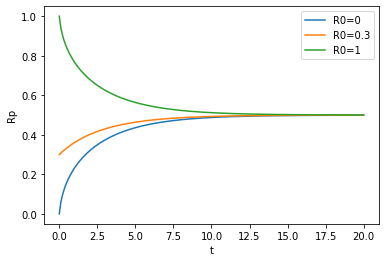

In [5]:
fig,ax = plt.subplots()
ax.plot(t,result[:,0],label='R0=0')
ax.plot(t,result[:,1],label='R0=0.3')
ax.plot(t,result[:,2],label='R0=1')
ax.legend()
ax.set_xlabel('t')
ax.set_ylabel('Rp')

Here we can see, no matter where the Rp starts, they will converge to somewhere around 0.5, and this is called a ***steady-state***. Steady-state is the gist of ODE because it defines the default behavior of a dynamic system. You may wonder why we call it a sigmoidal signal response curve? That is because apart from solving the solution curve, we are also interested in knowing how the signal strength will act upon the whole system, in ODE language, how signal strength will change the steady-state of the system? Now we are going to explore it!


Mathematically, a steady-state of a system is basically the root of the formula when setting dRp/dt = 0. A better illustration is as below:

$$
\begin{gathered}
\frac{d R_{p}}{d t}=0 \\
\frac{k_{1} S\left(R_{T}-R_{P}\right)}{k_{m 1}+R_{T}-R_{P}}-\frac{k_{2} R_{P}}{k_{m 2}+R_{P}}=0
\end{gathered}
 $$

 So if we can solve the last equation with respect to Rp, we will have the value of Rp in the steady-state.

In [6]:
S_all = np.linspace(0,3,100)
def equation(Rp,S):
    k1 = 1
    k2 = 1
    Rt = 1
    km1 = 0.05
    km2 = 0.05
    return k1*S*(Rt-Rp)/(km1+Rt-Rp) - k2*Rp/(km2+Rp)

from scipy.optimize import fsolve
store = []
for S in S_all:
    Rp_ss = fsolve(equation,[1],args=(S,))[0]
    store.append(Rp_ss)

We first set the range of signal S from 0–3, then we use `fsolve` function from `scipy.optimizeto` do the job. The result basically will be the Rp value when S is equal to the different values within 0–3.

Text(0, 0.5, 'Response(R_ss)')

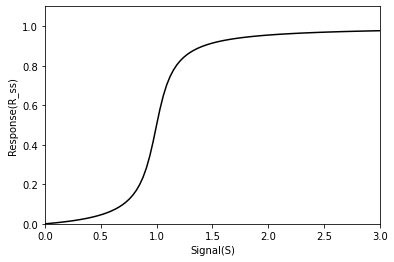

In [7]:
fig,ax = plt.subplots()
ax.plot(S_all,store,c='k')
ax.set_xlim(0,3)
ax.set_xlabel('Signal(S)')
ax.set_ylim(0,1.1)
ax.set_ylabel('Response(R_ss)')

Now, it's clear why it is called the sigmoidal signal-response curve because as the strength of the signal changes, the steady-state of the system will respond in a sigmoidal manner.